388855.63670775783


/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23559/3765294002.py:111: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  r = pd.read_csv('../data/filters/LSST_r.dat', delim_whitespace=True)
/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23559/3765294002.py:113: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  g = pd.read_csv('../data/filters//LSST_g.dat', delim_whitespace=True)
/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23559/3765294002.py:115: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  i = pd.read_csv('../data/filters//LSST_i.dat', delim_whitespace=True)
/var/folders/pw/nc5rj5md667b29kntncq7jbw0000gn/T/ipykernel_23559/3765294002.py:117: FutureWarning: The 'del

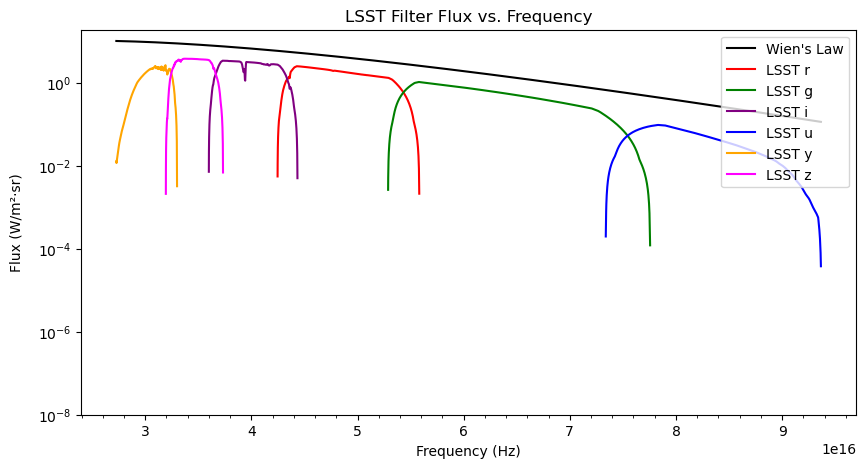

In [3]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.constants import h, c, k_B, m_p, R_sun, au
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Parameters that you can change for new model
c_factor = 0.1 #factor to change the speed of light for the velocity of forward shock
v_fs = c_factor * c.cgs.value #velocity of forward shock in m/s
dens = 1e-15 #density of agn disk

# Constants used 
#t = 5800 #Temp of sun for now can change for what we are looking at 
rad = R_sun #Radius of sun in meters for now will change to bh later
d = au #distance from earth to sun in meters change later to distance to agn
h = h.cgs.value #Planck constant
c = c.cgs.value #speed of light
k = k_B.cgs.value #Boltzmann constant
m_p = m_p.cgs.value #proton mass
pi = np.pi #Pi constant

# Function to calculate temperature based on velocity of forward shock and density
def temp_fxn(v_fs, dens, m_p, c, k):
    """
    Calculate the temperature t based on velocity of forward shock and other physical parameters. All parameters should be in CGS units

    Parameters
    ----------
    v_fs : float
        Velocity of the forward shock in m/s.
    dens : float
        Density of AGN disk.
    m_p : float
        Proton mass.
    c : float
        Speed of light.
    k : float
        Boltzmann constant.

    Returns
    -------
    t : float
        Calculated temperature.
    """
    b_fs = v_fs / c
    gamma_fs = 1 / np.sqrt(1 - b_fs**2)
    gamma_fs_f = gamma_fs**(1 + np.sqrt(3))
    gamma_sf = gamma_fs / np.sqrt(2)
    gamma_sf_f = gamma_sf**(1 + np.sqrt(3))
    n = dens / m_p

    if b_fs * gamma_fs <= 0.03:
        t = 1e4 * ((b_fs / 0.02)**0.5) * ((dens / 1e-16)**0.25)
    elif b_fs * gamma_fs > 0.03 and b_fs * gamma_fs <= 1:
        t = (10**(0.975 + (1.735 * ((b_fs / 0.1)**0.5)) + ((0.26 - 0.08 * ((b_fs / 0.1)**0.5)) * np.log10(n / 1e15)))) * 1e4
    elif b_fs * gamma_fs > 1:
        t = (gamma_sf_f * 5e4) / k
    if b_fs >= 1:
        print("Velocity is greater than speed of light, using beta = 0.98 instead")
        b_fs = 0.98
        gamma_fs = 1 / np.sqrt(1 - b_fs**2)
        gamma_sf = gamma_fs / np.sqrt(2)
        gamma_sf_f = gamma_sf**(1 + np.sqrt(3))
        t = (gamma_sf_f * 5e4) / k
    return t

# Plancks law for frequency in graph
def planck_fxn(filter, t):
    """Planck's law for frequency
    This function calculates the spectral radiance of a black body at a given temperature T for a specific frequency filter. All parameters should be in CGS units
    
    
    Parameters
    ----------
    filter : array-like 
        The frequency values for which to calculate the spectral radiance.
    t : float
        The temperature of the black body in Kelvin. Taken from the if functions depending on velocity of forward shock.
    Returns
    -------
    B : array-like
        Spectral radiance of the black body at the given frequency and temperature."""
    B = (((2*h*(filter**3))/(c**2)))*((1/(np.exp((h*filter)/(k*t))-1)))
    return B

#for when b is greater than 0.03 but less than 1 use wien in graph
def wien_fxn(filter, t):

    """Wien's law for frequency
    This function calculates the spectral radiance of a black body at a given temperature T for a specific frequency filter. All parameters should be in CGS units
    
    
    Parameters
    ----------
    filter : array-like
        The frequency values for which to calculate the spectral radiance.
    t : float
        The temperature of the black body in Kelvin. Taken from the if functions depending on velocity of forward shock.
    Returns
    -------
    B : array-like
        Spectral radiance of the black body at the given frequency and temperature."""
    B = ((2 * h * (filter**3)) / (c**2)) * np.exp(-((h * filter)/(k * t)))
    return B


# Reading and convering the LSST filter data


r = pd.read_csv('../data/filters/LSST_r.dat', delim_whitespace=True)
#red filter from 5371-7059
g = pd.read_csv('../data/filters//LSST_g.dat', delim_whitespace=True)
# green filter from 3865-5669
i = pd.read_csv('../data/filters//LSST_i.dat', delim_whitespace=True)
# infrared filter from 6761-8329
u = pd.read_csv('../data/filters//LSST_u.dat', delim_whitespace=True)
# ultraviolet filter from 3201-4085
y = pd.read_csv('../data/filters//LSST_y.dat', delim_whitespace=True)
# y filter from 9085-10989
z = pd.read_csv('../data/filters//LSST_z.dat', delim_whitespace=True)
# z filter from 8031-9385

r_eff = r.iloc[:, 1]  # 0 for wavelength 1 for transmission
g_eff = g.iloc[:, 1]
i_eff = i.iloc[:, 1]  
u_eff = u.iloc[:, 1]
y_eff = y.iloc[:, 1]
z_eff = z.iloc[:, 1]


r_filter = r.iloc[:, 0]  # 0 for wavelength 1 for transmission
g_filter = g.iloc[:, 0]
i_filter = i.iloc[:, 0]  
u_filter = u.iloc[:, 0]
y_filter = y.iloc[:, 0]
z_filter = z.iloc[:, 0]

r_wave = r_filter * 1e-10 # I think its in angstroms  
g_wave = g_filter * 1e-10
i_wave = i_filter * 1e-10
u_wave = u_filter * 1e-10
y_wave = y_filter * 1e-10
z_wave = z_filter * 1e-10

# converting wavelength to frequency
r_freq = c/r_wave #using c already below as 3e8
g_freq = c/g_wave
i_freq = c/i_wave
u_freq = c/u_wave
y_freq = c/y_wave
z_freq = c/z_wave


b_fs = v_fs / c
gamma_fs = 1 / np.sqrt(1 - b_fs**2)

t = temp_fxn(v_fs, dens, m_p, c, k)  # Calculate temperature based on forward shock velocity and density

# Planck's law for frequency (for when b_fs * gamma_fs <= 0.03)
planck_r = planck_fxn(r_freq,t)
planck_g = planck_fxn(g_freq,t)
planck_i = planck_fxn(i_freq,t) 
planck_u = planck_fxn(u_freq,t)
planck_y = planck_fxn(y_freq,t)
planck_z = planck_fxn(z_freq,t)

# Combining the filter data and planck law 

r_planck = planck_r * r_eff #total output for given filter in planck law
g_planck = planck_g * g_eff
i_planck = planck_i * i_eff
u_planck = planck_u * u_eff
y_planck = planck_y * y_eff
z_planck = planck_z * z_eff

r_total = sum(r_planck) #combinging the 1600ish values in each filter for total output
g_total = sum(g_planck)
i_total = sum(i_planck)
u_total = sum(u_planck)
y_total = sum(y_planck)
z_total = sum(z_planck)

#ratio of highest output to other filters
r_ratio = r_total / i_total
g_ratio = g_total / i_total
i_ratio = i_total / i_total
u_ratio = u_total / i_total
y_ratio = y_total / i_total
z_ratio = z_total / i_total

#Planck law graph
total_wave = np.concatenate((r_wave, g_wave, i_wave, u_wave, y_wave, z_wave)) #combining all the wavelengths in one 
planck_total = np.concatenate((planck_r, planck_g, planck_i, planck_u, planck_y, planck_z)) #Full Planck law
trans_total = np.concatenate((r_planck, g_planck, i_planck, u_planck, y_planck, z_planck))
total_freq = np.concatenate((r_freq, g_freq, i_freq, u_freq, y_freq, z_freq))#sorting the frequency values
sorted_freq = np.sort(total_freq)

# To make plancks law graph smooth 
total_index = np.argsort(total_freq)
total_wave = total_wave[total_index]
planck_total = (planck_total[total_index])  

# planck law based on area
planck_area = (planck_total * pi * (rad**2))

# planck law based on distance 
planck_dist = (planck_area/(4 * pi * (d**2)))

#t_mid = 1e4

# Wien's law for frequency (used when b_fs * gamma_fs > 0.03)
wien_r = wien_fxn(r_freq, t)
wien_g = wien_fxn(g_freq, t)
wien_i = wien_fxn(i_freq, t) 
wien_u = wien_fxn(u_freq, t)
wien_y = wien_fxn(y_freq, t)
wien_z = wien_fxn(z_freq, t)

wien_freq = np.concatenate((wien_r, wien_g, wien_i, wien_u, wien_y, wien_z)) #combining all the wien values
wien_total = (wien_freq[total_index])  # sorting the wien values 

# wien law based on area
wien_area = (wien_total * pi * (rad**2))

# wien law based on distance 
wien_dist = (wien_area/(4 * pi * (d**2)))

r_wien = wien_r * r_eff #total output for given filter in wien law
g_wien = wien_g * g_eff
i_wien = wien_i * i_eff
u_wien = wien_u * u_eff
y_wien = wien_y * y_eff
z_wien = wien_z * z_eff

# when b  is greater than 1 force it to use beta = 1- precision of instruement and give a warning 

print(t)

# Plot Code
plt.figure(figsize=(10, 5))

if b_fs*gamma_fs <= 0.03:
    plt.plot(sorted_freq, planck_total, color='black', label="Planck's Law")
    plt.plot(r_freq, r_planck, color='red', label='LSST r')
    plt.plot(g_freq, g_planck, color='green', label='LSST g')
    plt.plot(i_freq, i_planck, color='purple', label='LSST i')
    plt.plot(u_freq, u_planck, color='blue', label='LSST u')
    plt.plot(y_freq, y_planck, color='orange', label='LSST y')
    plt.plot(z_freq, z_planck, color='magenta', label='LSST z')
else:
    plt.plot(sorted_freq, wien_total, color='black', label="Wien's Law")
    plt.plot(r_freq, r_wien, color='red', label='LSST r')
    plt.plot(g_freq, g_wien, color='green', label='LSST g')
    plt.plot(i_freq, i_wien, color='purple', label='LSST i')
    plt.plot(u_freq, u_wien, color='blue', label='LSST u')
    plt.plot(y_freq, y_wien, color='orange', label='LSST y')
    plt.plot(z_freq, z_wien, color='magenta', label='LSST z')
    plt.yscale('log')  # Set y-axis to logarithmic scale

#labels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Flux (W/m²·sr)", labelpad=10)
plt.ylim(bottom=1e-8) # Makes y axis at 0
plt.minorticks_on()  # Add ticks inside the axis
plt.title("LSST Filter Flux vs. Frequency")
plt.legend(loc='upper right')

plt.show()

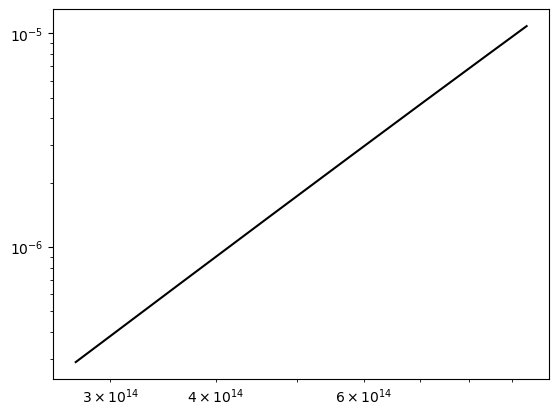

In [5]:

plt.plot(sorted_freq, wien_total, color='black', label="Wien's Law")
plt.yscale('log')  # Set x-axis to logarithmic scale
plt.xscale('log')  # Set x-axis to logarithmic scale


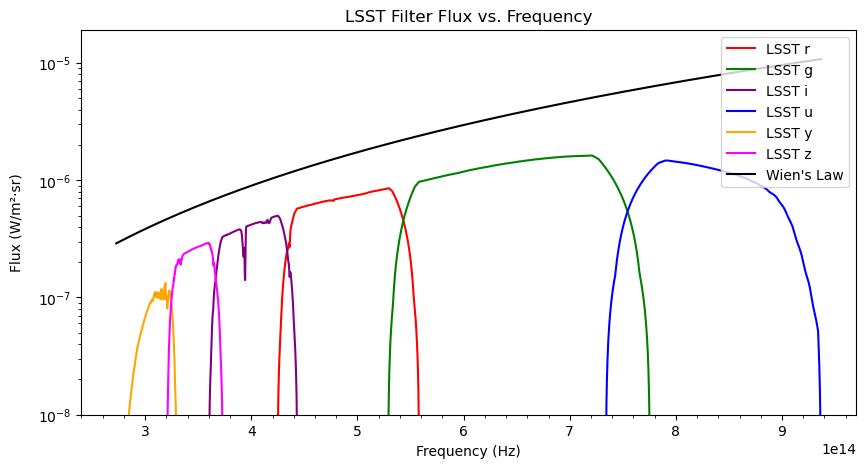

In [ ]:
# Plot Code
plt.figure(figsize=(10, 5))

if b_fs*gamma_fs <= 0.03:
    plt.plot(sorted_freq, planck_total, color='black', label="Planck's Law")
    plt.plot(r_freq, r_planck, color='red', label='LSST r')
    plt.plot(g_freq, g_planck, color='green', label='LSST g')
    plt.plot(i_freq, i_planck, color='purple', label='LSST i')
    plt.plot(u_freq, u_planck, color='blue', label='LSST u')
    plt.plot(y_freq, y_planck, color='orange', label='LSST y')
    plt.plot(z_freq, z_planck, color='magenta', label='LSST z')
else:
    plt.plot(sorted_freq, wien_total, color='black', label="Wien's Law")
    plt.plot(r_freq, r_wien, color='red', label='LSST r')
    plt.plot(g_freq, g_wien, color='green', label='LSST g')
    plt.plot(i_freq, i_wien, color='purple', label='LSST i')
    plt.plot(u_freq, u_wien, color='blue', label='LSST u')
    plt.plot(y_freq, y_wien, color='orange', label='LSST y')
    plt.plot(z_freq, z_wien, color='magenta', label='LSST z')
    plt.yscale('log')  # Set y-axis to logarithmic scale

#labels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Flux (W/m²·sr)", labelpad=10)
plt.ylim(bottom=1e-8) # Makes y axis at 0
plt.minorticks_on()  # Add ticks inside the axis
plt.title("LSST Filter Flux vs. Frequency")
# plt.annotate(f'{u_ratio:.3g}', (7.8e14, 0.1e-8), fontsize=8, color='blue') #for u filter
# plt.annotate(f'{g_ratio:.3g}', (6.5e14, 0.1e-8), fontsize=8, color='green') #for g filter
# plt.annotate(f'{r_ratio:.3g}', (4.8e14, 0.1e-8), fontsize=8, color='red') #for r filter
# plt.annotate(f'{i_ratio:.3g}', (3.9e14, 0.1e-8), fontsize=10, color='purple') #for i filter
# plt.annotate(f'{y_ratio:.3g}', (2.9e14, 0.1e-8), fontsize=8, color='orange') #for y filter
# plt.annotate(f'{z_ratio:.3g}', (3.3e14, 0.1e-8), fontsize=8, color='magenta') #for z filter
plt.legend(loc='upper right')

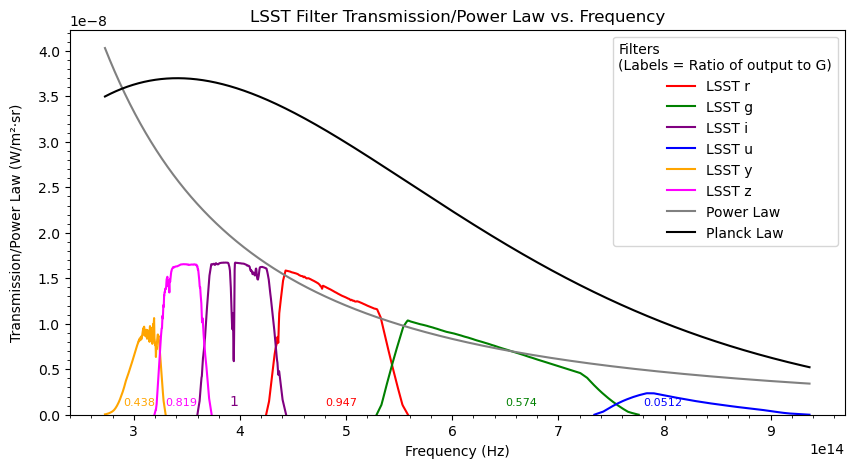

In [ ]:
# Plot Code
plt.figure(figsize=(10, 5))
plt.plot(r_freq, r_planck, color='red', label='LSST r')
plt.plot(g_freq, g_planck, color='green', label='LSST g')
plt.plot(i_freq, i_planck, color='purple', label='LSST i')
plt.plot(u_freq, u_planck, color='blue', label='LSST u')
plt.plot(y_freq, y_planck, color='orange', label='LSST y')
plt.plot(z_freq, z_planck, color='magenta', label='LSST z')
#plt.plot(sorted_freq, planck_fxn(sorted_freq, t) / 2.2, label="Planck Func")
plt.plot(sorted_freq, 3e21 * sorted_freq ** -2, color='grey', label="Power Law") #power law for frequency
plt.plot(sorted_freq, planck_total, color='black', label="Planck Law")


#labels
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transmission/Power Law (W/m²·sr)", labelpad=10)
plt.ylim(bottom=0) # Makes y axis at 0
plt.minorticks_on()  # Add ticks inside the axis
plt.title("LSST Filter Transmission/Power Law vs. Frequency")
plt.annotate(f'{u_ratio:.3g}', (7.8e14, 0.1e-8), fontsize=8, color='blue') #for u filter
plt.annotate(f'{g_ratio:.3g}', (6.5e14, 0.1e-8), fontsize=8, color='green') #for g filter
plt.annotate(f'{r_ratio:.3g}', (4.8e14, 0.1e-8), fontsize=8, color='red') #for r filter
plt.annotate(f'{i_ratio:.3g}', (3.9e14, 0.1e-8), fontsize=10, color='purple') #for i filter
plt.annotate(f'{y_ratio:.3g}', (2.9e14, 0.1e-8), fontsize=8, color='orange') #for y filter
plt.annotate(f'{z_ratio:.3g}', (3.3e14, 0.1e-8), fontsize=8, color='magenta') #for z filter
plt.legend(title="Filters\n(Labels = Ratio of output to G)",loc='upper right')

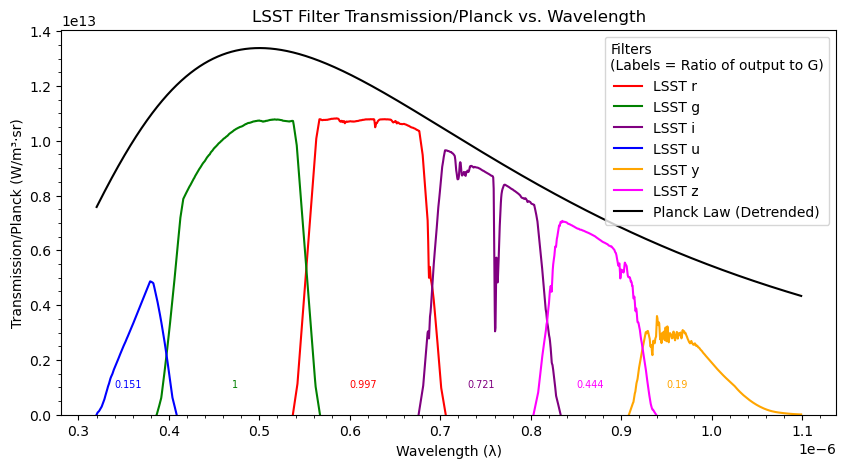

In [ ]:
# Plot Code
plt.figure(figsize=(10, 5))
plt.plot(r_wave, r_planck, color='red', label='LSST r')
plt.plot(g_wave, g_planck, color='green', label='LSST g')
plt.plot(i_wave, i_planck, color='purple', label='LSST i')
plt.plot(u_wave, u_planck, color='blue', label='LSST u')
plt.plot(y_wave, y_planck, color='orange', label='LSST y')
plt.plot(z_wave, z_planck, color='magenta', label='LSST z')
plt.plot(total_wave, planck_total, color='black', label='Planck Law (Detrended)')
#plt.plot(total_wave, flux, color='gray', linestyle='--', label='Total Transmission')

# Plot Labels 
plt.ylim(bottom=0) # Makes y axis at 0
plt.minorticks_on()  # Add ticks inside the axis
plt.xlabel("Wavelength (λ)")
plt.ylabel("Transmission/Planck (W/m³·sr)")
plt.title("LSST Filter Transmission/Planck vs. Wavelength")
plt.annotate(f'{u_ratio:.3g}', (0.34e-6, 0.1e13), fontsize=7, color='blue') #for u filter
plt.annotate(f'{g_ratio:.3g}', (0.47e-6, 0.1e13), fontsize=7, color='green') #for g filter
plt.annotate(f'{r_ratio:.3g}', (0.6e-6, 0.1e13), fontsize=7, color='red') #for r filter
plt.annotate(f'{i_ratio:.3g}', (0.73e-6, 0.1e13), fontsize=7, color='purple') #for i filter
plt.annotate(f'{y_ratio:.3g}', (0.95e-6, 0.1e13), fontsize=7, color='orange') #for y filter
plt.annotate(f'{z_ratio:.3g}', (0.85e-6, 0.1e13), fontsize=7, color='magenta') #for z filter
plt.legend(title="Filters\n(Labels = Ratio of output to G)",loc='upper right')